In [32]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
Ddata = pd.read_csv("Delivery_time.csv")
Ddata.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [34]:
Ddata.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# Exploraratory Data Analysis (EDA) & Visualisation 

In [35]:
Ddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [36]:
Ddata.shape

(21, 2)

In [37]:
Ddata.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

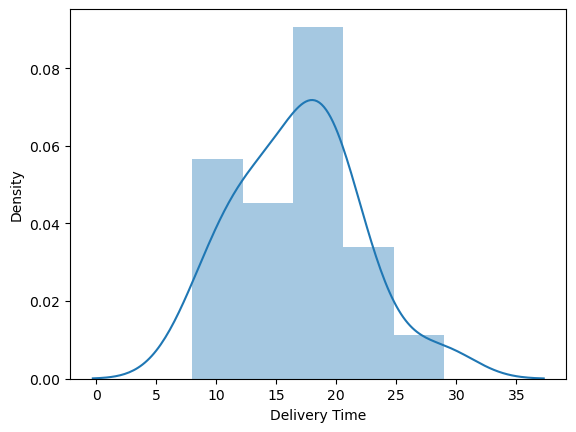

In [38]:
sns.distplot(Ddata['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

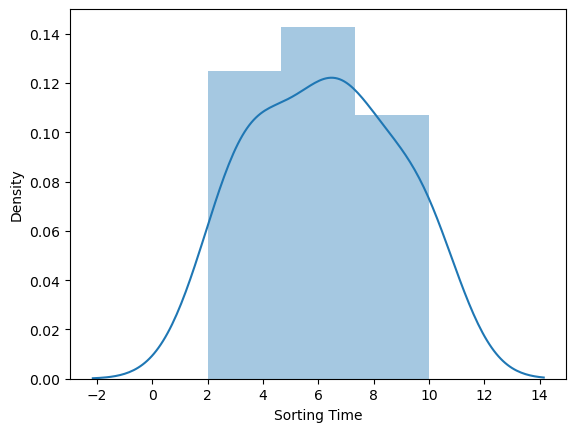

In [39]:
sns.distplot(Ddata['Sorting Time'])

# Duplicated Data

In [40]:
Ddata[Ddata.duplicated()].shape

(0, 2)

In [41]:
Ddata[Ddata.duplicated()]

,Delivery Time,Sorting Time


# Rename the Columns 

In [42]:
data_ren=Ddata.rename({"Delivery Time":"Delivery_time", "Sorting Time":"Sorting_time"}, axis=1)

In [43]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [44]:
data_cop = data_ren.copy()

In [45]:
data_cop.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Outlier Detection

<AxesSubplot:>

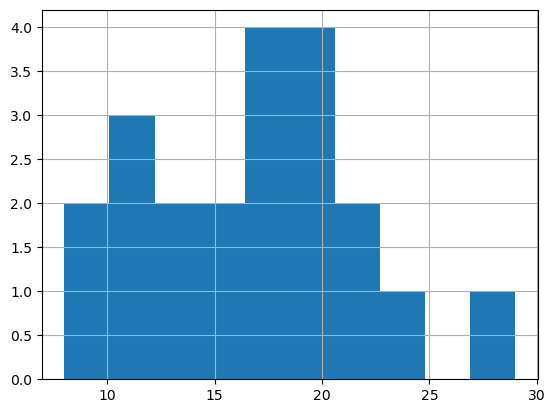

In [46]:

data_ren['Delivery_time'].hist()

<AxesSubplot:>

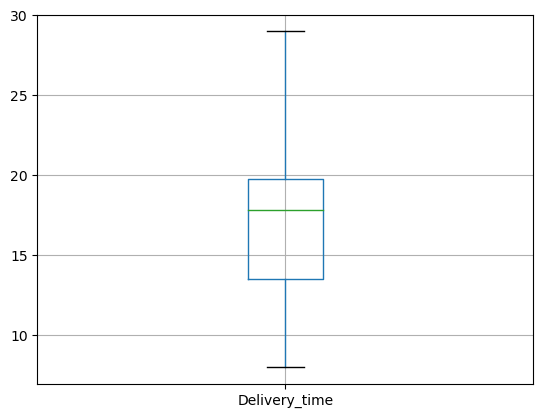

In [47]:

data_ren.boxplot(column='Delivery_time')

In [48]:
data_ren["Delivery_time"].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_time, dtype: float64

<AxesSubplot:>

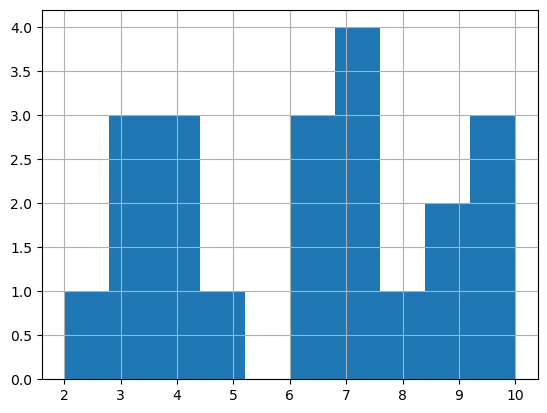

In [49]:
data_ren['Sorting_time'].hist()

<AxesSubplot:>

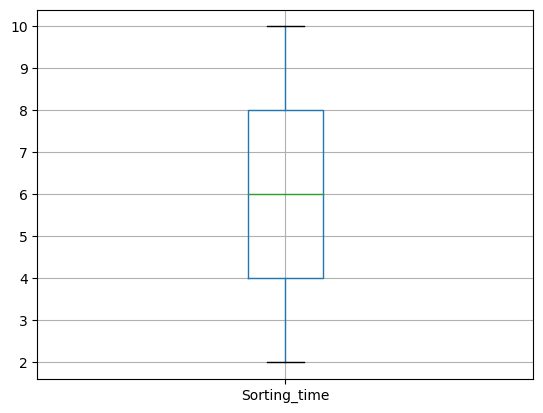

In [50]:
data_ren.boxplot(column='Sorting_time')

In [51]:
data_ren['Sorting_time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_time, dtype: float64

# Missing values Imputation

<AxesSubplot:>

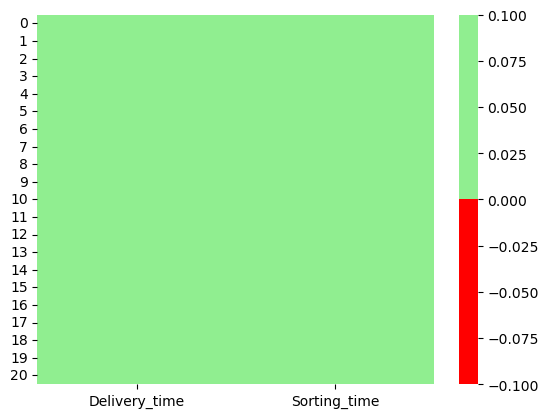

In [52]:
# using seaborn for heatmap
cols = data_ren.columns
colours = ['red', 'lightgreen']# in this figure red color shows Missing values and lightgreen shows all data
sns.heatmap(data_ren[cols].isnull(), cmap=sns.color_palette(colours))

In [53]:
data_ren[data_ren.isnull().any(axis=1)].head(6)

,Delivery_time,Sorting_time


There is no missing values in this given Data so can we move to next steps.

#  Correlation and Ploting the Data 

In [54]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [55]:
data_ren.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


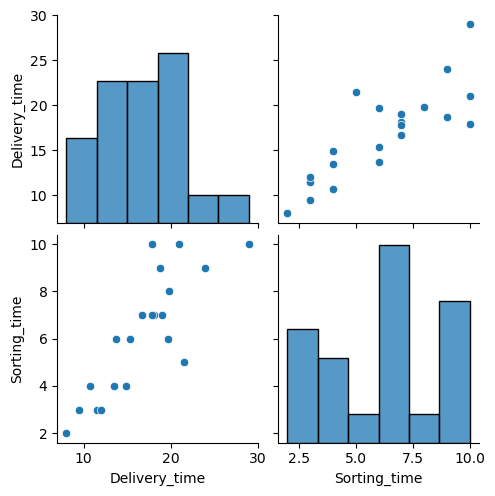

In [56]:
sns.pairplot(data_ren)

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

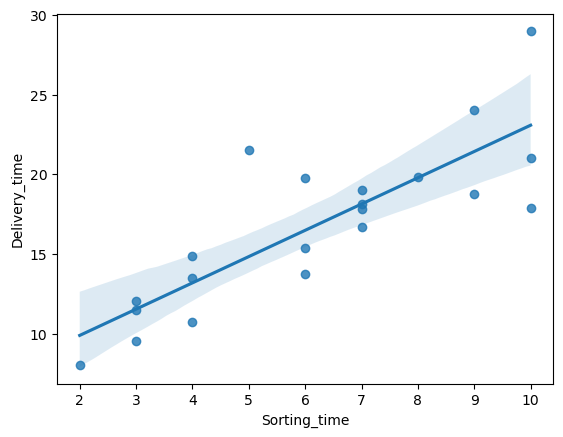

In [57]:
sns.regplot(x=data_ren["Sorting_time"], y=data_ren["Delivery_time"])

# Transformations

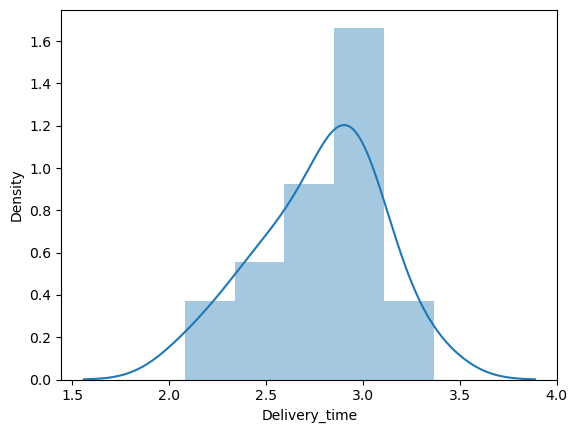

<Figure size 640x480 with 0 Axes>

In [58]:
# 1. log transofrmation
import numpy as np
data2_log =np.log(data_cop['Delivery_time'])
sns.distplot(data2_log)
fig=plt.figure()

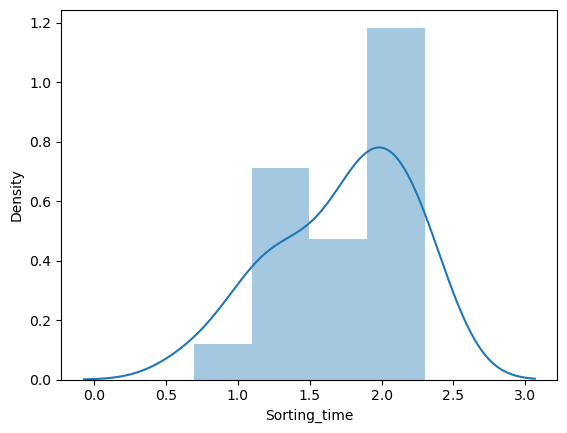

<Figure size 640x480 with 0 Axes>

In [59]:
#log Transformation for Sorting feature
data2_logS =np.log(data_cop['Sorting_time'])
sns.distplot(data2_logS)
fig=plt.figure()

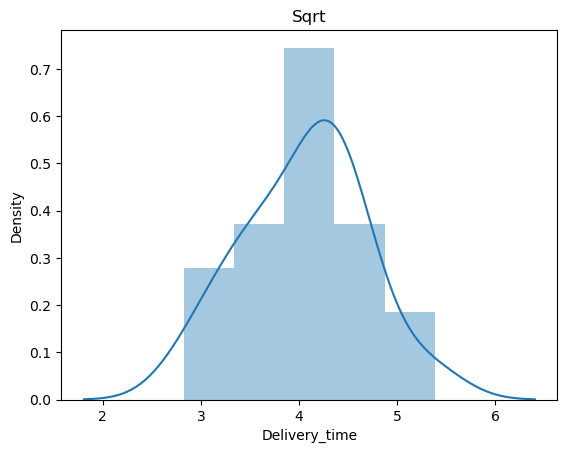

<Figure size 640x480 with 0 Axes>

In [60]:
#Square root Transformation 
data2_sqrt=np.sqrt(data_cop['Delivery_time'])
sns.distplot(data2_sqrt)
plt.title('Sqrt')
fig=plt.figure()

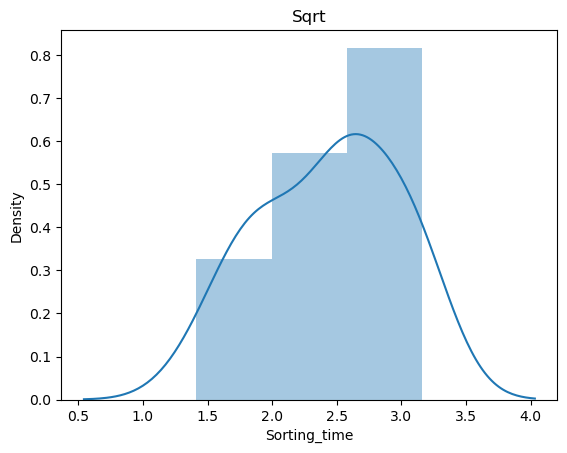

<Figure size 640x480 with 0 Axes>

In [61]:
#Sqrt for Sorting Column
data2_Ssqrt=np.sqrt(data_cop['Sorting_time'])
sns.distplot(data2_Ssqrt)
plt.title('Sqrt')
fig=plt.figure()

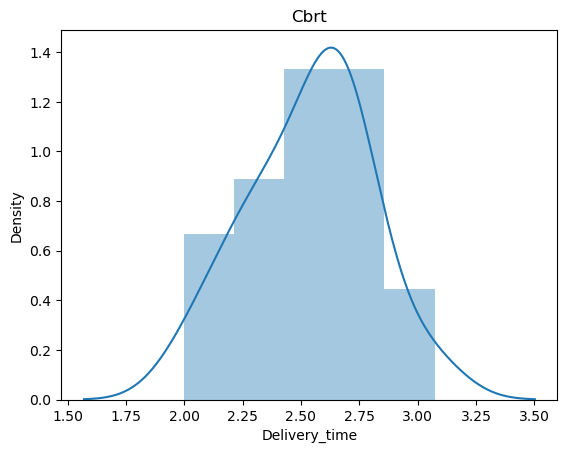

<Figure size 640x480 with 0 Axes>

In [63]:
#Cube root transformation
data2_cbrt=np.cbrt(data_cop['Delivery_time'])
sns.distplot(data2_cbrt)
plt.title('Cbrt')
fig=plt.figure()

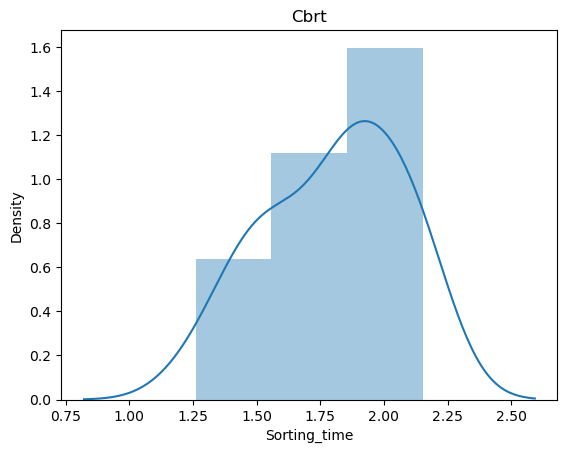

<Figure size 640x480 with 0 Axes>

In [64]:
#Cbrt for Sorting 
data2_Scbrt=np.cbrt(data_cop['Sorting_time'])
sns.distplot(data2_Scbrt)
plt.title('Cbrt')
fig=plt.figure()

In [65]:
#Normalisation of the Data
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler

In [66]:
data_ren.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [67]:
array=data_ren.values
scalar =MinMaxScaler(feature_range=(0,1))
rescaledx=scalar.fit_transform(array[:,0:5])

In [68]:
#Transformed Data
set_printoptions(precision =2)
print(rescaledx[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [69]:
#Standerdized Data
from sklearn.preprocessing import StandardScaler 

In [70]:
array=data_ren.values
scalar =StandardScaler().fit(array)
rescaledx=scalar.transform(array)

In [71]:
#Summurize Transformed Data
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


# Create Linear Regression Model

In [72]:
data_ren.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [73]:
Lrmodel = smf.ols("Delivery_time~Sorting_time", data=data_ren).fit()

# Testing the model

In [ ]:
Lrmodel.params

In [ ]:
Lrmodel.tvalues, Lrmodel.pvalues

In [ ]:
Lrmodel.rsquared, Lrmodel.rsquared_adj